In [61]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import rectangle
from skimage.filters import sobel
from skimage.io import imread

plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (16, 12)

# figure out regex search
IMAGES_PATH = Path('./lazy_d_core_photos/')
search = "core_photo*box9.jpg"

def img_get(path=IMAGES_PATH, search=search):
    """return posix path for images"""
    return sorted(list(IMAGES_PATH.glob(search)))

def img_plot(image):
    """quick plot for rgb and grayscale images"""
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()
    
def compare_plot(image1, image2, alpha2=0.25):
    """compare original image to transformation"""
    fig, axes = plt.subplots(1, 3, figsize=(16,12))
    ax = axes.ravel()
    for x in ax: x.axis("off")

    if image1.ndim == 2:
        ax[0].imshow(image1, cmap=plt.gray)
        ax[1].imshow(image1)
        ax[1].imshow(image2, alpha=alpha2)
        ax[2].imshow(image2)
    else:
        ax[0].imshow(image1)
        ax[1].imshow(image1)
        ax[1].imshow(image2, alpha=alpha2)
        ax[2].imshow(image2)

    img_info(image1)
    img_info(image2)
    
    plt.show()

def img_info(image):
    """quick info for rgb and grayscale images"""
    if image.ndim == 2:
        print(image.dtype, image.min(), image.max(), image.shape, image[0,0])
    else:
        print(image.dtype, image.min(), image.max(), image.shape, image[0,0,:])

def extract_core_column(img):
    """
    extract a core column from base corebox photo.

    return original imgage, colorized mask, and extracted core column.
    """

    mask = np.full(img.shape[0:2], False, dtype=bool)
    # parameterize start and end
    rr, cc = rectangle(start=(250, 330), end=(3050, 725))
    mask[rr, cc] = True
    mask_coords = np.argwhere(mask)
    x0, y0 = mask_coords.min(axis=0)
    x1, y1 = mask_coords.max(axis=0)

    img_mask = np.copy(img)
    # parameterize colors
    img_mask[mask] = [0,0,255]  # blue
    cropped_img = img[x0:x1, y0:y1]

    return img_mask, cropped_img

         

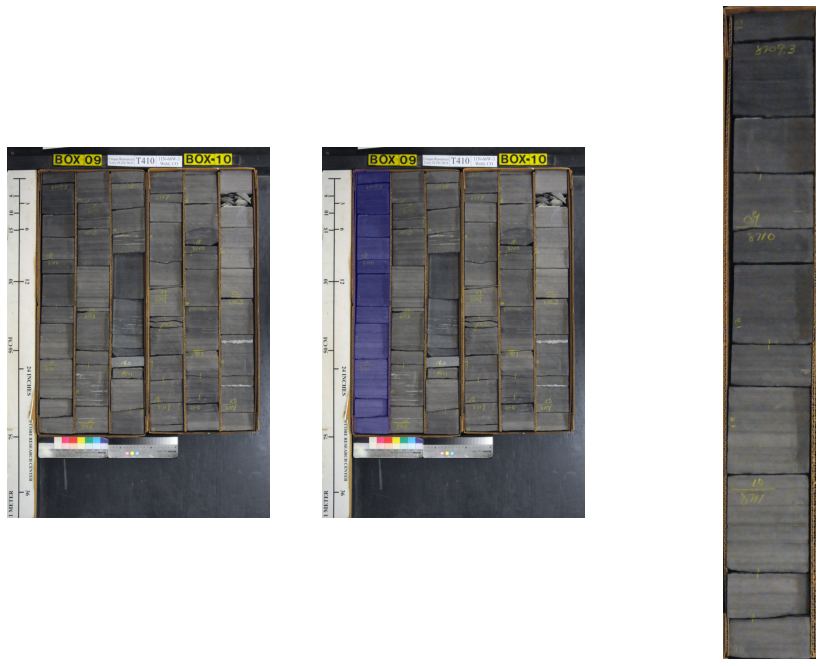

In [66]:
box9 = imread(img_get()[0])
box9_mask, box9_cropped = extract_core_column(box9)

fig, axes = plt.subplots(1, 3, figsize=(16,12))
ax = axes.ravel()
for x in ax: x.axis("off")

ax[0].imshow(box9)
ax[1].imshow(box9)
ax[1].imshow(box9_mask, alpha=0.20)
ax[2].imshow(box9_cropped)

plt.show()

# check if the cropped photo can be plotted on corebox --> different ndims


## Image mask

[PosixPath('lazy_d_core_photos/core_photo_111348_box9.jpg')]
uint8 0 255 (3942, 2789, 3) [28 29 33]
uint8 0 255 (3942, 2789, 3) [28 29 33]


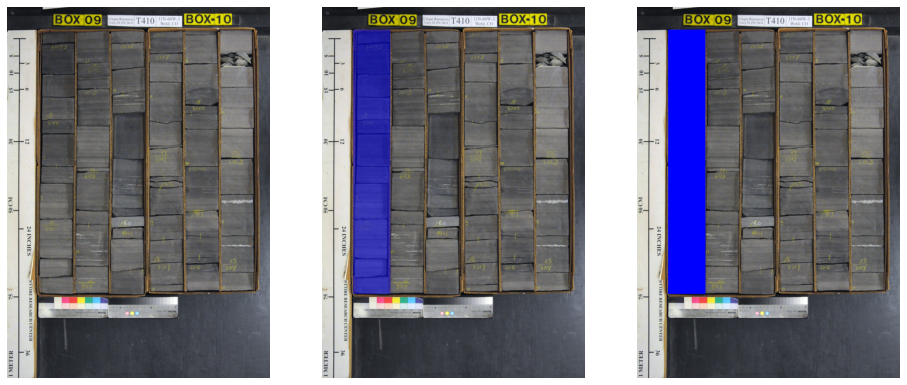

In [32]:
def rectangle_mask():
    search = "core_photo*box9.jpg"
    imgs = img_get(search=search)
    print(imgs)
    
    box9 = imread(imgs[0])
    mask = np.full(box9.shape[0:2], False, dtype=bool)
    rr, cc = rectangle(start=(250, 330), end=(3050,725))
    mask[rr, cc] = True
    
    box9_mask = np.copy(box9)
    box9_mask[mask] = [0,0,255]
    # crop
    compare_plot(box9, box9_mask)

    return box9, box9_mask, mask
    
box9, box9_mask, mask = rectangle_mask()

250 3051
330 726
(2801, 396, 3)


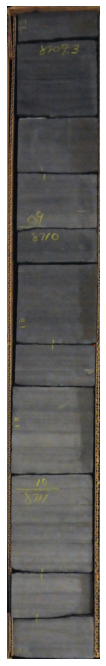

In [47]:
coords = np.argwhere(mask)
x0, y0 = coords.min(axis=0)
x1, y1 = coords.max(axis=0) + 1  # account for inclusive slice

# same as rectangle coords 
print(x0, x1)
print(y0, y1)

cropped = box9[x0:x1, y0:y1]
print(cropped.shape)
img_plot(cropped)



In [34]:
rectangle?

Signature: rectangle(start, end=None, extent=None, shape=None)
Docstring:
Generate coordinates of pixels within a rectangle.

Parameters
----------
start : tuple
    Origin point of the rectangle, e.g., ``([plane,] row, column)``.
end : tuple
    End point of the rectangle ``([plane,] row, column)``.
    For a 2D matrix, the slice defined by the rectangle is
    ``[start:(end+1)]``.
    Either `end` or `extent` must be specified.
extent : tuple
    The extent (size) of the drawn rectangle.  E.g.,
    ``([num_planes,] num_rows, num_cols)``.
    Either `end` or `extent` must be specified.
    A negative extent is valid, and will result in a rectangle
    going along the opposite direction. If extent is negative, the
    `start` point is not included.
shape : tuple, optional
    Image shape used to determine the maximum bounds of the output
    coordinates. This is useful for clipping rectangles that exceed
    the image size. By default, no clipping is done.

Returns
-------
coords : arr

## Load napiri polygons

## Sobel Filter

uint8 0 255 (3942, 2789, 3)
float64 0.0 0.5128304612830016 (3942, 2789, 3)


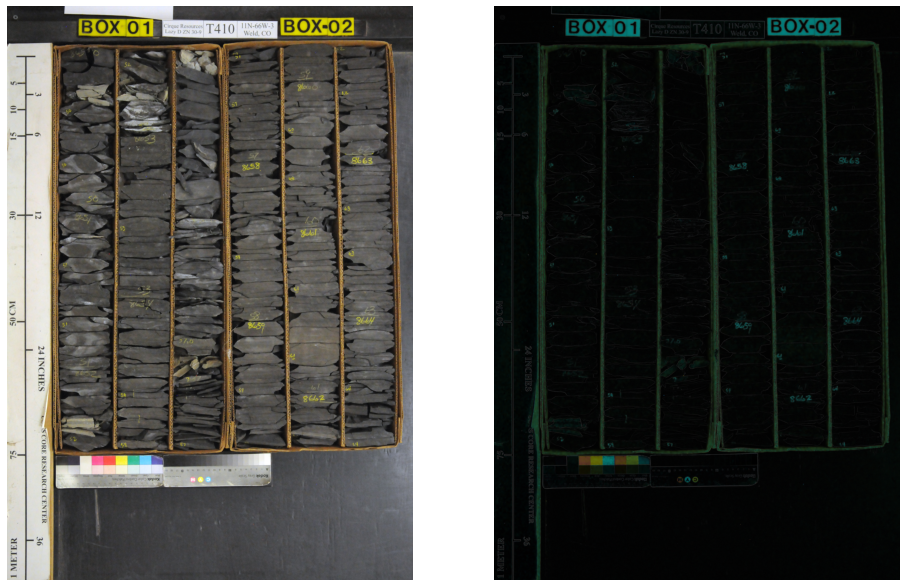

In [6]:

img = "./lazy_d_core_photos/core_photo_111344_box1.jpg"
original = imread(img)
edge_filt = sobel(original)

fig, axes = plt.subplots(1, 2, figsize=(16,12))
ax = axes.ravel()
for x in ax: x.axis("off")

ax[0].imshow(original)
ax[1].imshow(edge_filt)

img_info(original)
img_info(edge_filt)